In [5]:
import pandas as pd
import numpy as np
from binfit import Hist1d
from binfit import Hist2d

### Read Dataframes for making histograms

In [6]:
df_umatch = pd.read_pickle('./ulnu.pickle')
dfD = pd.read_pickle('./D.pickle')
dfDst = pd.read_pickle('./Dst.pickle')
dfDstst = pd.read_pickle('./Dstst.pickle')

### Initialize fit variable binfit histograms

In [7]:
var= 'gx_m'

var_binning = np.array([0.,1.6, 1.9, 2.3, 2.5, 2.8])
binrange = (var_binning[0],var_binning[-1])

hsig = Hist1d(bins=var_binning, range=binrange, data=df_umatch[var], weights=df_umatch['tot_w_0'])
hD = Hist1d(bins=var_binning, range=binrange, data=dfD[var], weights=dfD['tot_w_0'])
hDst = Hist1d(bins=var_binning, range=binrange, data=dfDst[var], weights=dfDst['tot_w_0'])
hDstst = Hist1d(bins=var_binning, range=binrange, data=dfDstst[var], weights=dfDstst['tot_w_0'])
dftot = df_umatch.append([dfD,dfDst,dfDstst])
htot = Hist1d(bins=var_binning, range=binrange, data=dftot[var], weights=dftot['tot_w_0'])

/tmp/ipykernel_7774/968347177.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dftot = df_umatch.append([dfD,dfDst,dfDstst])


## Initialize binfit model builder

In [8]:
import binfit
from binfit import Template1d
from binfit import Template2d
from binfit.fitting import BinFitter
from binfit.parameters.parametershandler import ParameterHandler
from binfit.models.modelbuilder  import ModelBuilder
from binfit.templates.multitemplate import MultiNormTemplate


# container for all parameters 
params = ParameterHandler()

#initialise templates
tsig = Template1d('ulnu',var, hsig,params,'indianred')
tD= Template1d('D',var, hD,params,'navy')
tDst= Template1d('Dst',var, hDst,params,'orange')
tDstst= Template1d('Dstst',var, hDstst,params,'olivedrab')

# mMke a multitemplate for clnu
ctemps = {'D':tD,'Dst':tDst,'Dstst':tDstst}
pars = {'D':0.3,'Dst':0.5}
# Make a Multinorm template this requires N -1 fractions 
tbkg = MultiNormTemplate('clnu', ctemps,params,pars,color = 'lightskyblue')

# define data histogram
hdata = htot

# Define model builder 
nmodel = ModelBuilder(params,hdata)
nmodel.AddTemplate(tsig, 1000.)
nmodel.AddTemplate(tbkg, 4000.)

# initialisation
nmodel._create_block_diag_inv_corr_mat()
nmodel.TemplateMatrix()
nmodel.RelativeErrorMatrix()
nmodel.InitialiseBinPars()
nmodel.FractionConverter()


## Inialize fitter and od a fit

In [9]:
fitter = BinFitter(nmodel,'iminuit')

In [10]:
fitter.do_fit()

[(None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]


/home/sutclw/anaconda3/envs/b2ana/lib/python3.8/site-packages/iminuit/util.py:183: IMinuitWarning: Assigned errors must be positive. Non-positive values are replaced by a heuristic.
  warnings.warn(


MinimizeResult(fcn_min_val=1.2617423253313717e-07, params=<binfit.fitting.minimizer.Parameters object at 0x7f7098ab5fa0>, succes=True)

## Plot fit 

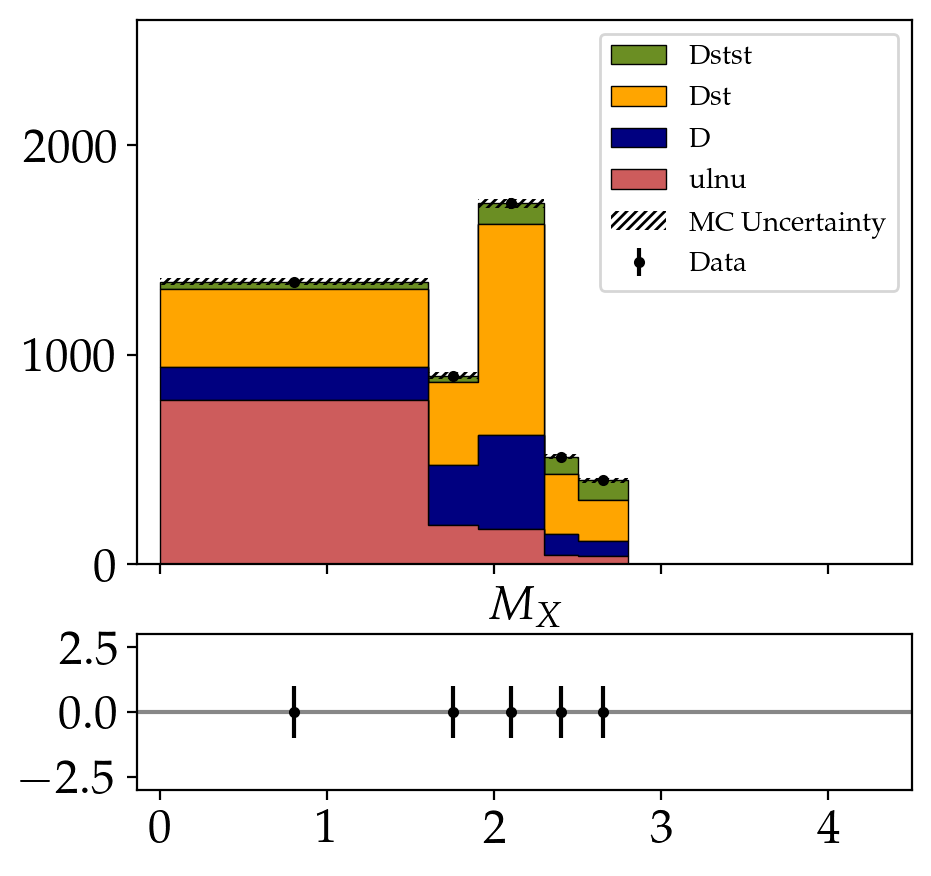

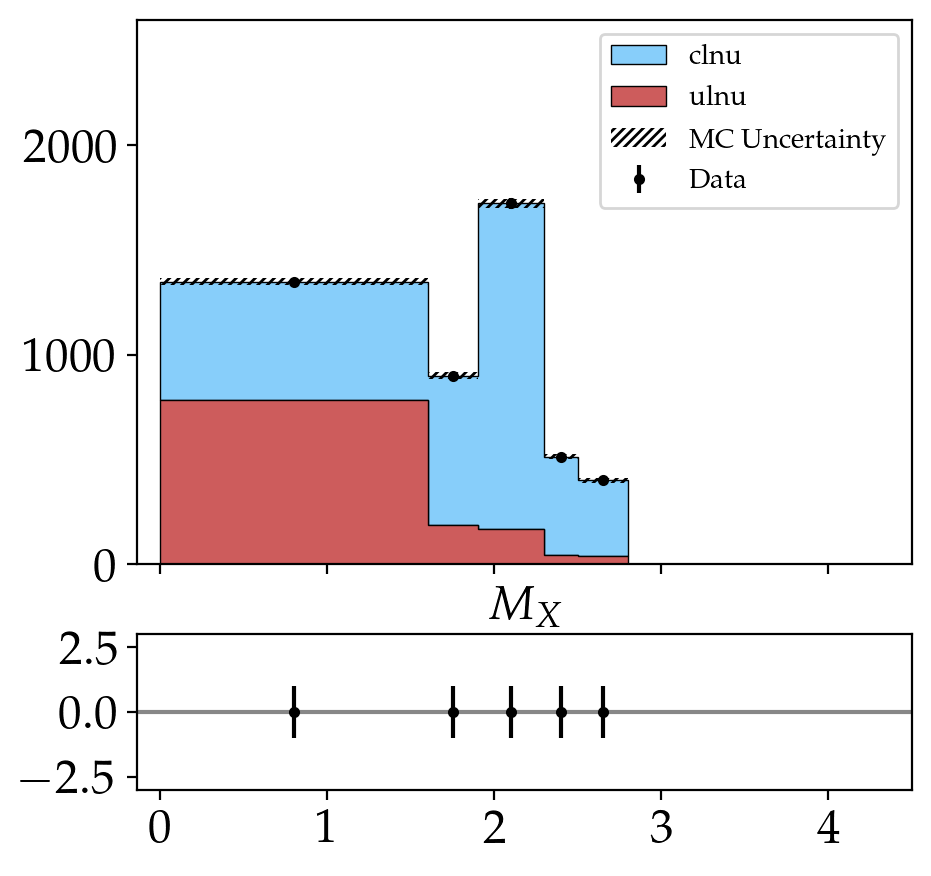

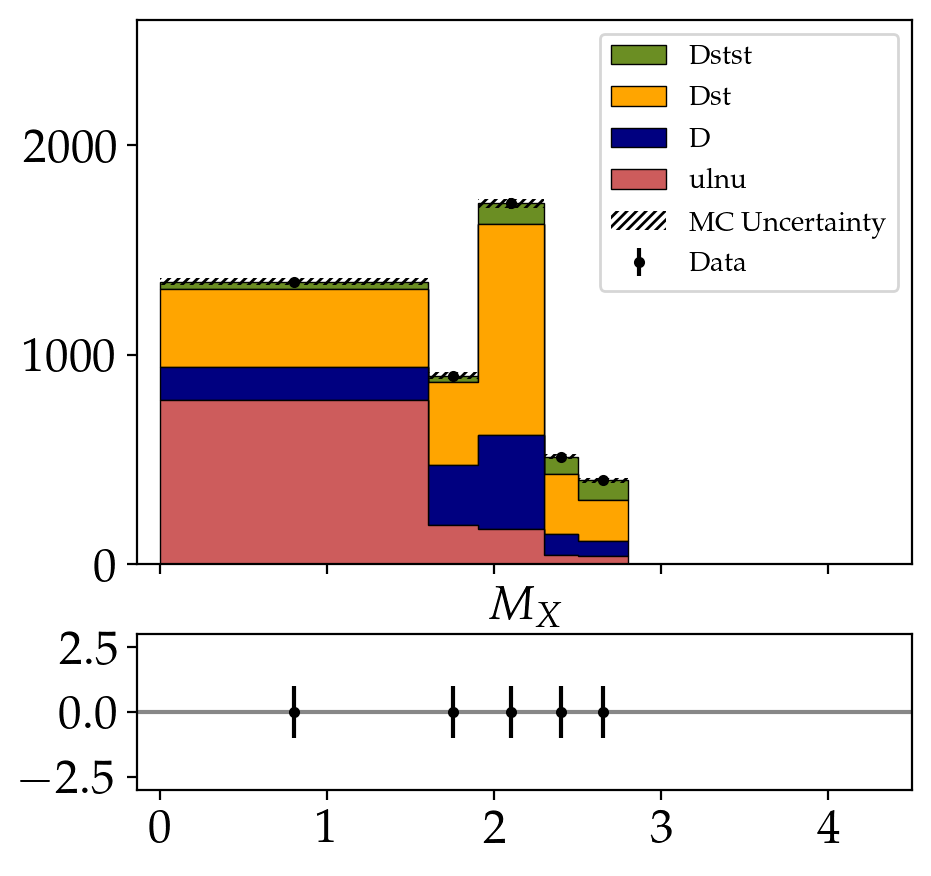

In [13]:
from matplotlib import rc
%matplotlib inline

## for Palatino and other serif fonts use:
rc('font',**{'size':17,'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
import matplotlib.pyplot as plt
fig, axis = plt.subplots(2, 1, figsize=(5, 5), dpi=200, sharex=True, gridspec_kw={"height_ratios": [3.5, 1]})

nmodel.plot_stacked_on(axis,All='True')

axis[0].legend(loc='upper right',fontsize=10)
axis[0].set_ylim(top=2600)
axis[0].set_xlim(right=4.5)
axis[0].set_xlabel(r'$M_{X}$')
#plt.savefig("MX.pdf")
plt.savefig('MX_all.pdf')

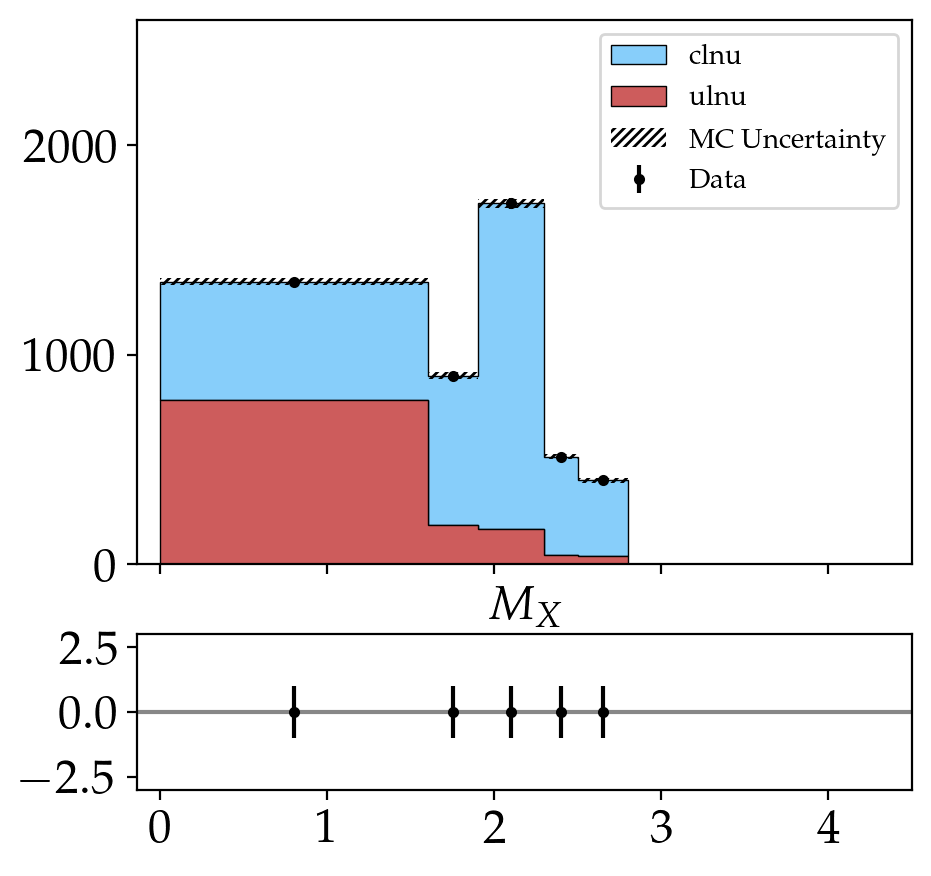

In [14]:
from matplotlib import rc

## for Palatino and other serif fonts use:
rc('font',**{'size':17,'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
import matplotlib.pyplot as plt
fig, axis = plt.subplots(2, 1, figsize=(5, 5), dpi=200, sharex=True, gridspec_kw={"height_ratios": [3.5, 1]})

nmodel.plot_stacked_on(axis)

axis[0].legend(loc='upper right',fontsize=10)
axis[0].set_ylim(top=2600)
axis[0].set_xlim(right=4.5)
axis[0].set_xlabel(r'$M_{X}$')
#plt.savefig("MX.pdf")
plt.savefig('MX.pdf')